# Generating Ocean Masks

This notebook demonstrates how to generate ocean masks for various regions. It utilizes the `genBasinMasks` function to create these masks effectively.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings("ignore")
from mom6_tools.m6plot import xyplot
from mom6_tools.m6toolbox import genBasinMasks, cime_xmlquery
from mom6_tools.MOM6grid import MOM6grid
import yaml, os
import numpy 
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

ERROR 1: PROJ: proj_create_from_database: Open of /glade/work/gmarques/conda-envs/mom6-tools/share/proj failed


Basemap module not found. Some regional plots may not function properly


In [3]:
# Read in the yaml file
diag_config_yml_path = "diag_config.yml"
diag_config_yml = yaml.load(open(diag_config_yml_path,'r'), Loader=yaml.Loader)

In [4]:
caseroot = diag_config_yml['Case']['CASEROOT']
casename = cime_xmlquery(caseroot, 'CASE')
DOUT_S = cime_xmlquery(caseroot, 'DOUT_S')
if DOUT_S:
  OUTDIR = cime_xmlquery(caseroot, 'DOUT_S_ROOT')+'/ocn/hist/'
else:
  OUTDIR = cime_xmlquery(caseroot, 'RUNDIR')

print('Output directory is:', OUTDIR)
print('Casename is:', casename)

Output directory is: /glade/derecho/scratch/gmarques/archive/g.e30_a03c.GJRAv4.TL319_t232_wgx3_hycom1_N75.2024.079/ocn/hist/
Casename is: g.e30_a03c.GJRAv4.TL319_t232_wgx3_hycom1_N75.2024.079


In [5]:
# create an empty class object
class args:
  pass

args.casename = casename
args.static = casename+diag_config_yml['Fnames']['static']
args.geom =   casename+diag_config_yml['Fnames']['geom']

In [6]:
# read grid info
geom_file = OUTDIR+'/'+args.geom
if os.path.exists(geom_file):
  grd = MOM6grid(OUTDIR+'/'+args.static, geom_file)
else:
  grd = MOM6grid(OUTDIR+'/'+args.static)

try:
  depth = grd.depth_ocean
except:
  depth = grd.deptho

# remote Nan's, otherwise genBasinMasks won't work
depth[numpy.isnan(depth)] = 0.0

MOM6 grid successfully loaded... 



### Create masks for different regions

In [7]:
basin_code = genBasinMasks(grd.geolon, grd.geolat, depth)

### Check and plot code number for each region defined

In [8]:
vals = numpy.unique(basin_code)

<Figure size 1200x800 with 0 Axes>

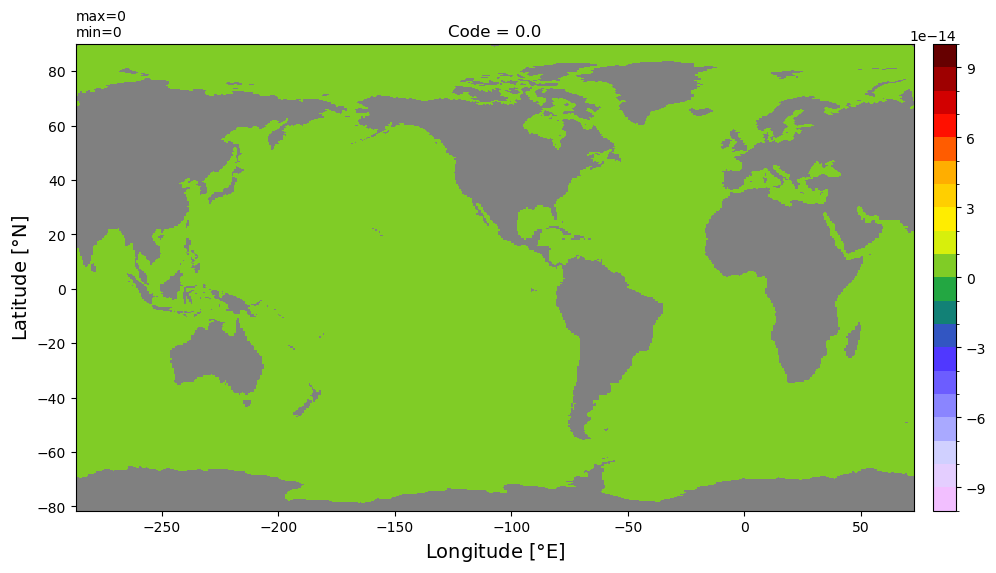

<Figure size 1200x800 with 0 Axes>

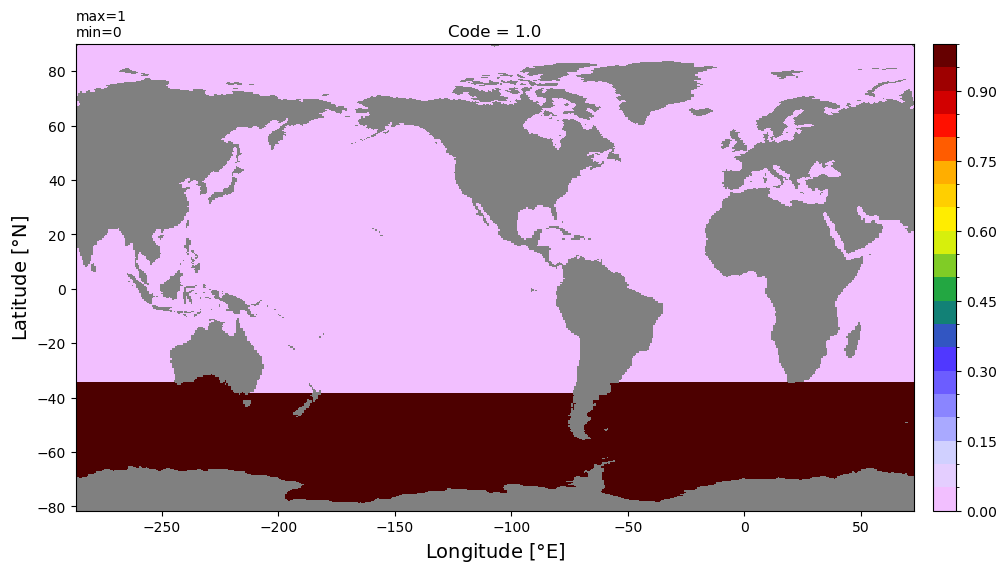

<Figure size 1200x800 with 0 Axes>

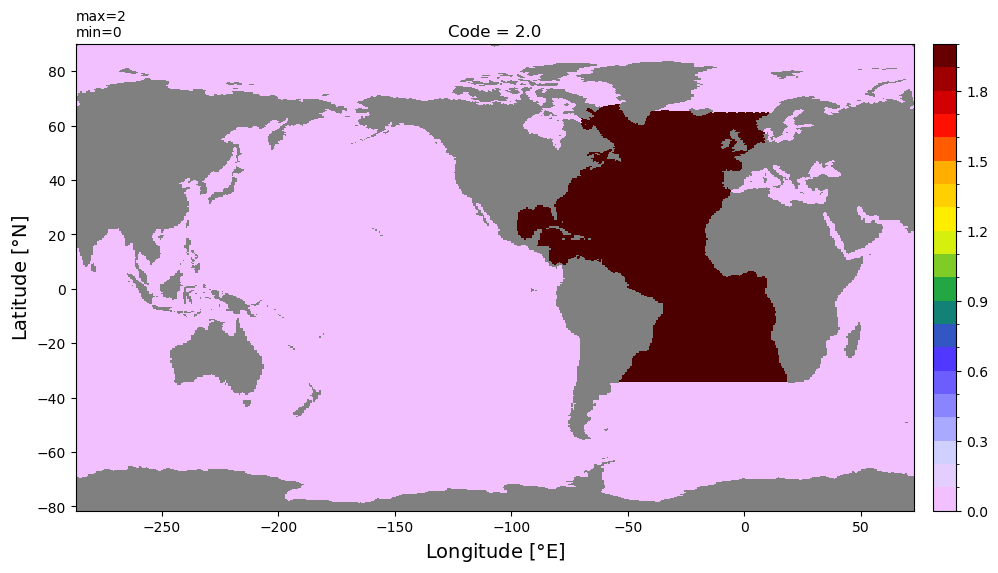

<Figure size 1200x800 with 0 Axes>

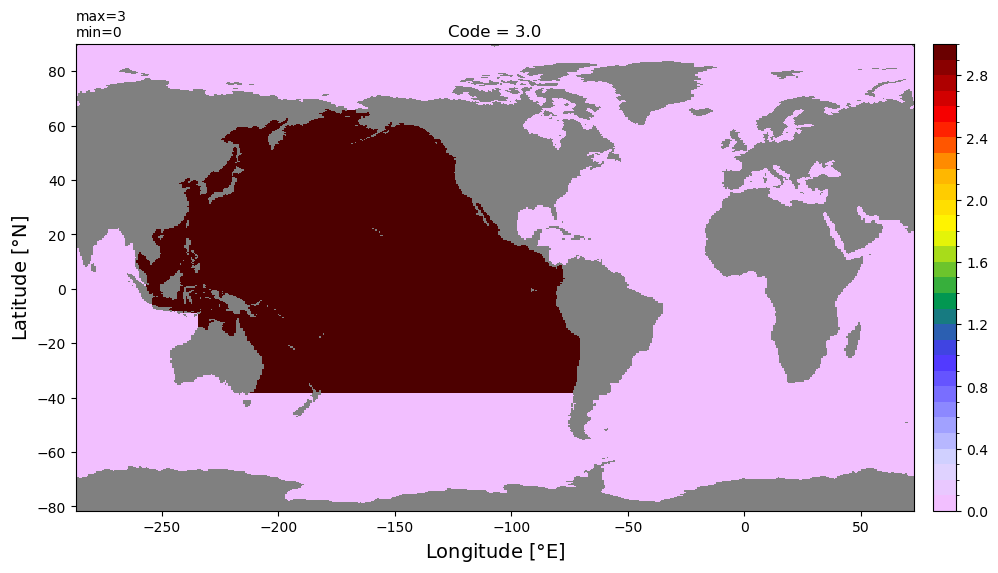

<Figure size 1200x800 with 0 Axes>

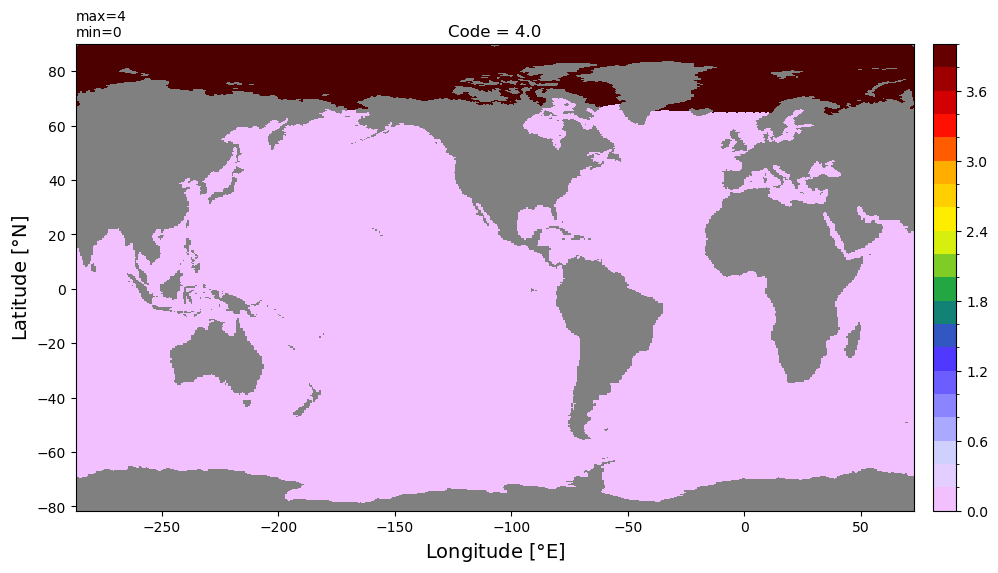

<Figure size 1200x800 with 0 Axes>

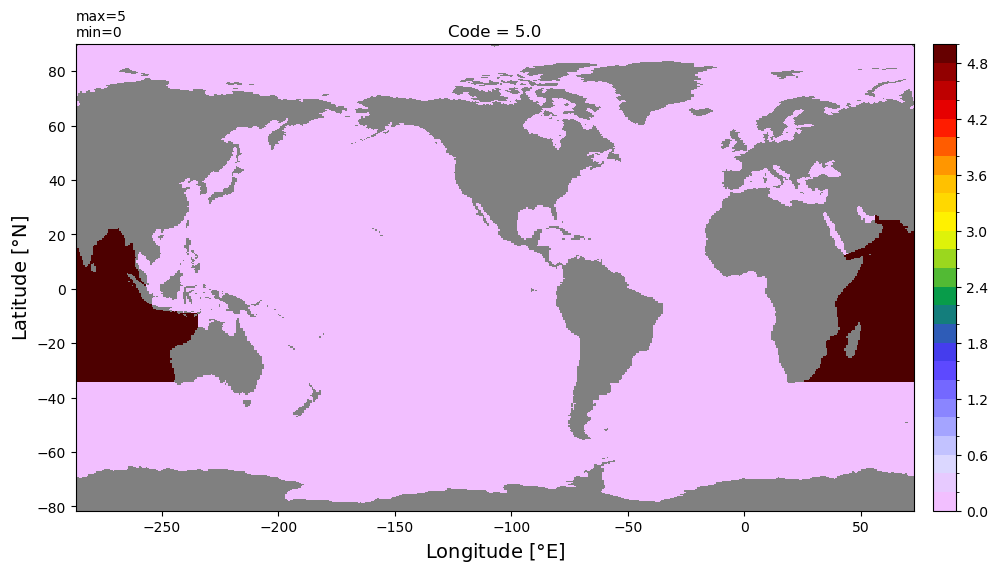

<Figure size 1200x800 with 0 Axes>

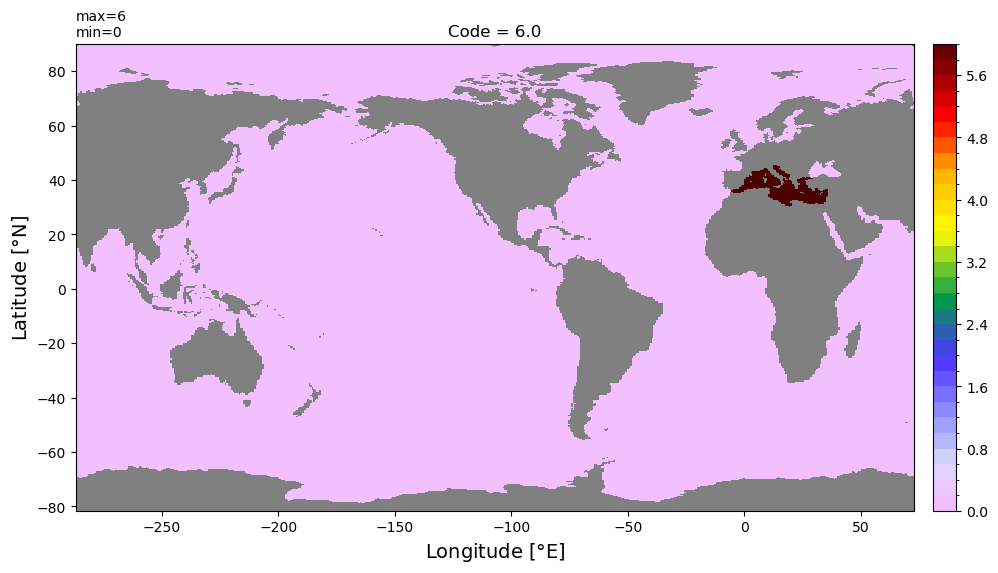

<Figure size 1200x800 with 0 Axes>

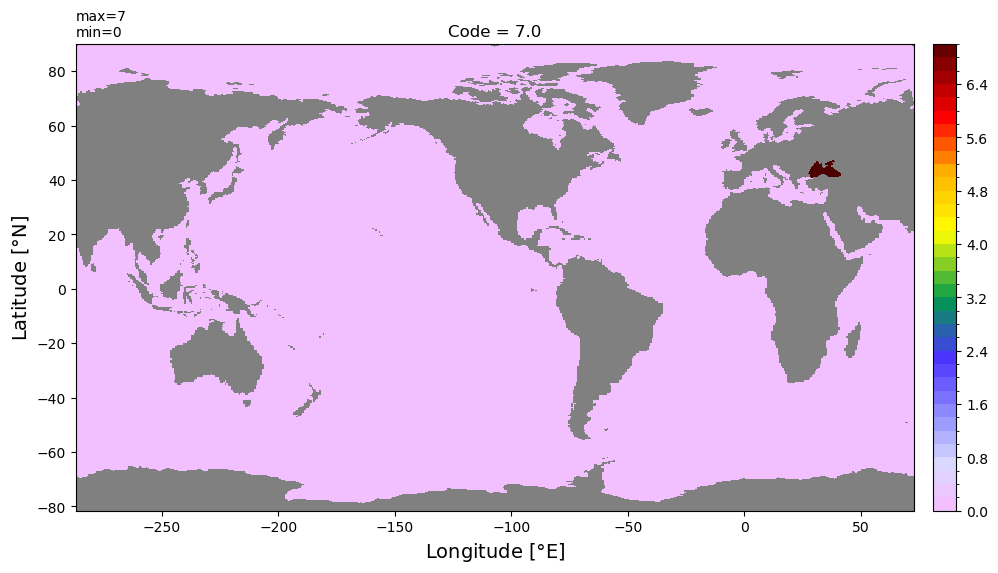

<Figure size 1200x800 with 0 Axes>

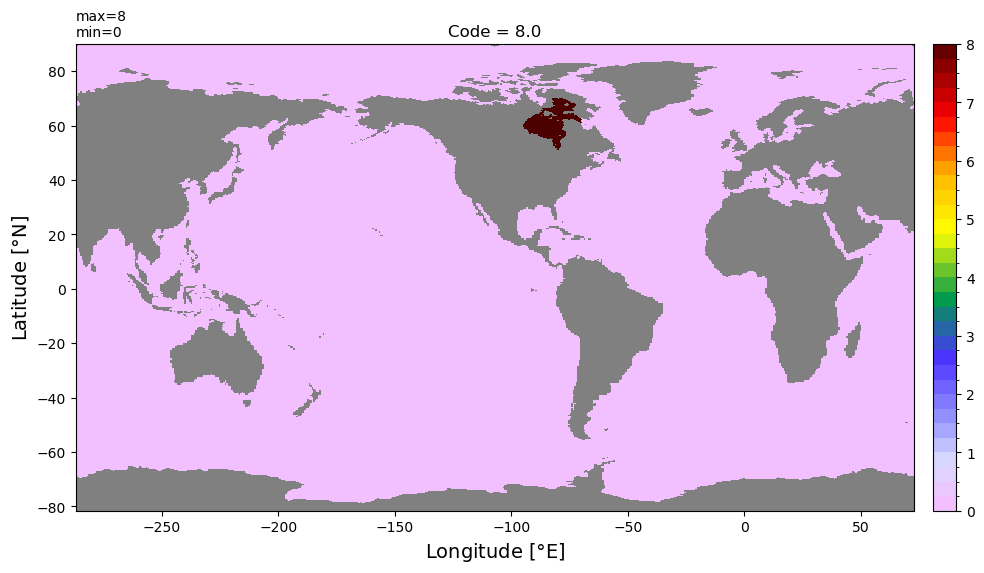

<Figure size 1200x800 with 0 Axes>

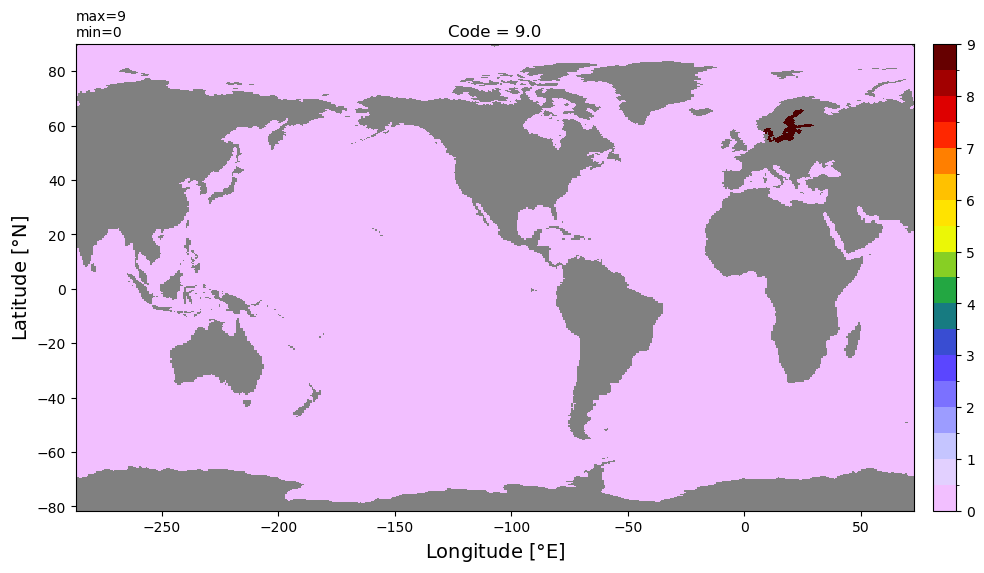

<Figure size 1200x800 with 0 Axes>

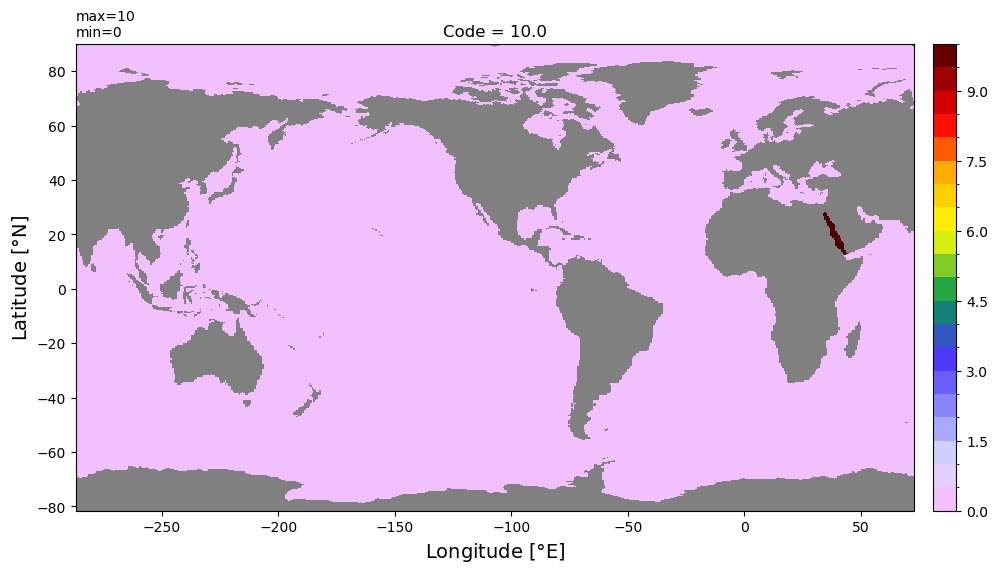

<Figure size 1200x800 with 0 Axes>

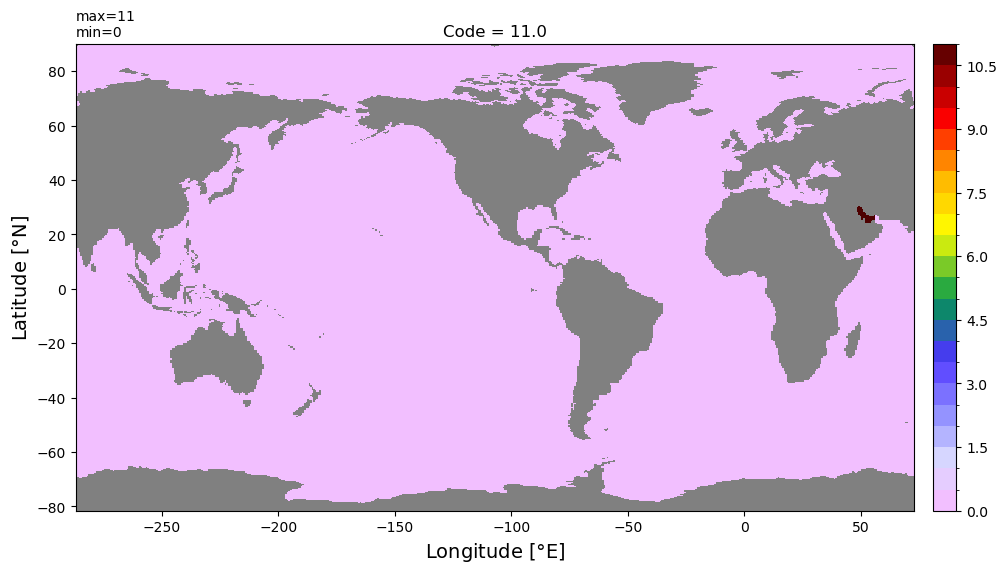

In [9]:
for v in vals:
    dummy = numpy.zeros(basin_code.shape)
    dummy[basin_code == v] = v
    dummy = numpy.ma.masked_where(depth == 0., dummy)
    plt.figure(figsize=(12,8))
    xyplot(dummy, grd.geolon, grd.geolat,title='Code = '+str(v));

### Check and plot "name" of each region defined

In [10]:
# reload codes as dataarray
basin_code = genBasinMasks(grd.geolon, grd.geolat, depth, xda=True)

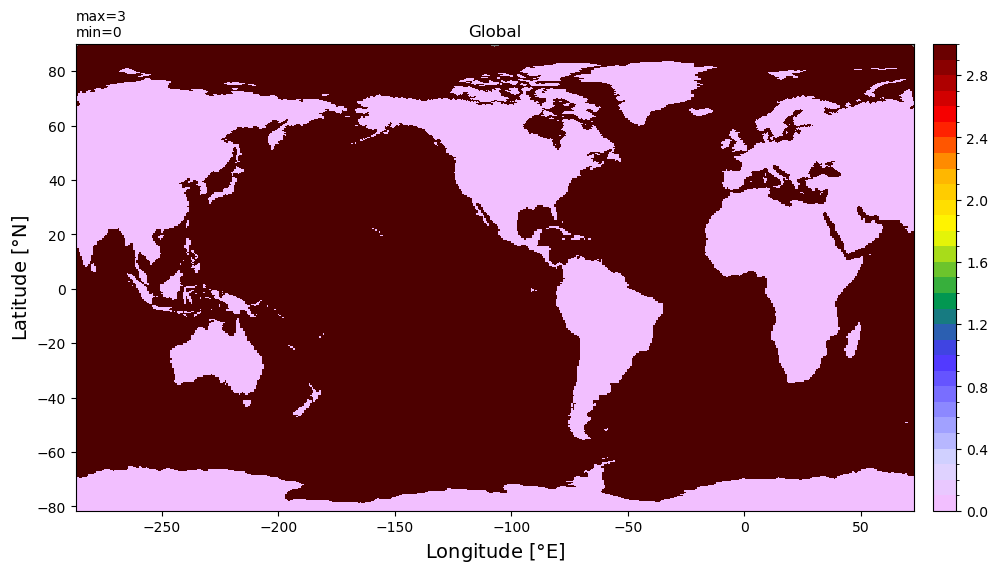

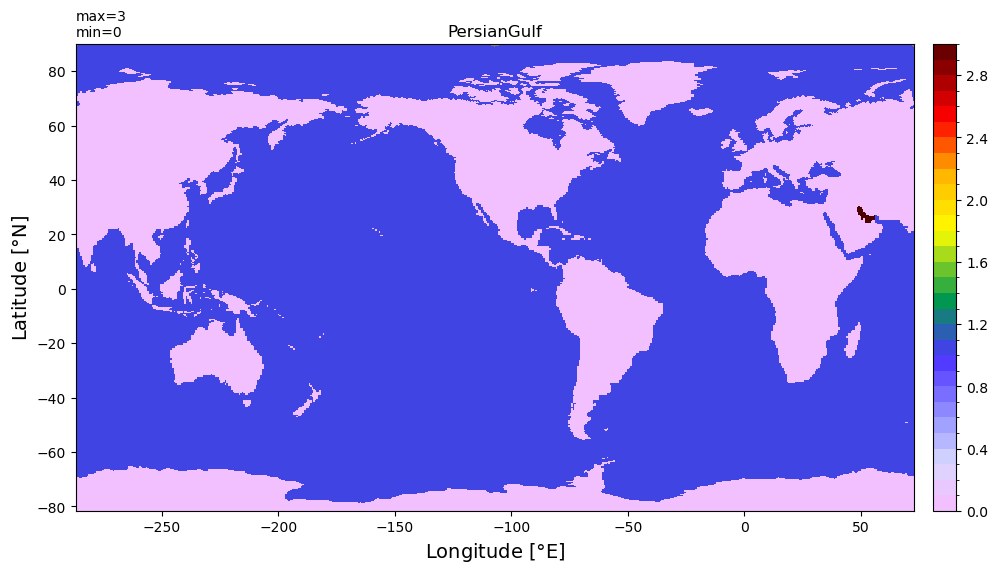

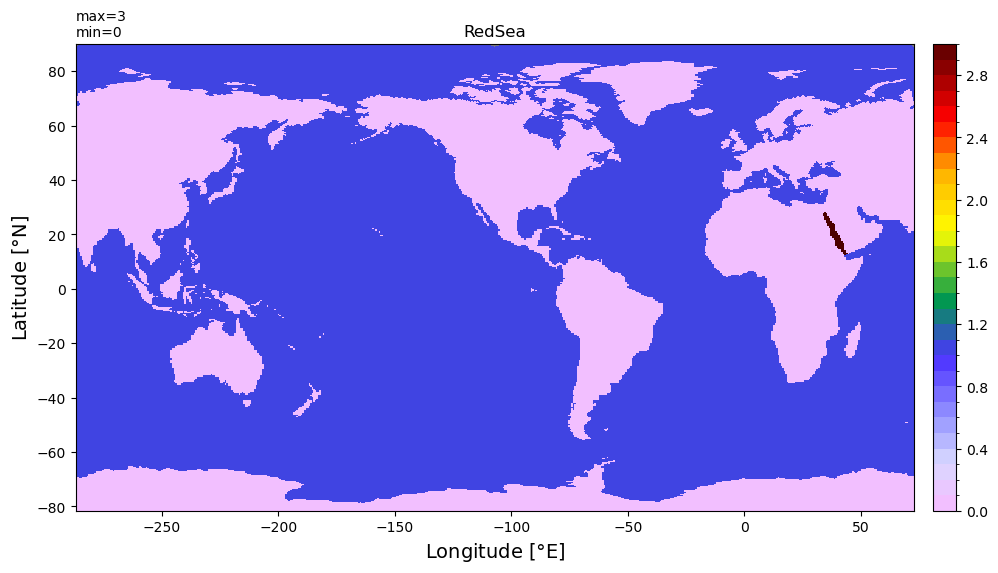

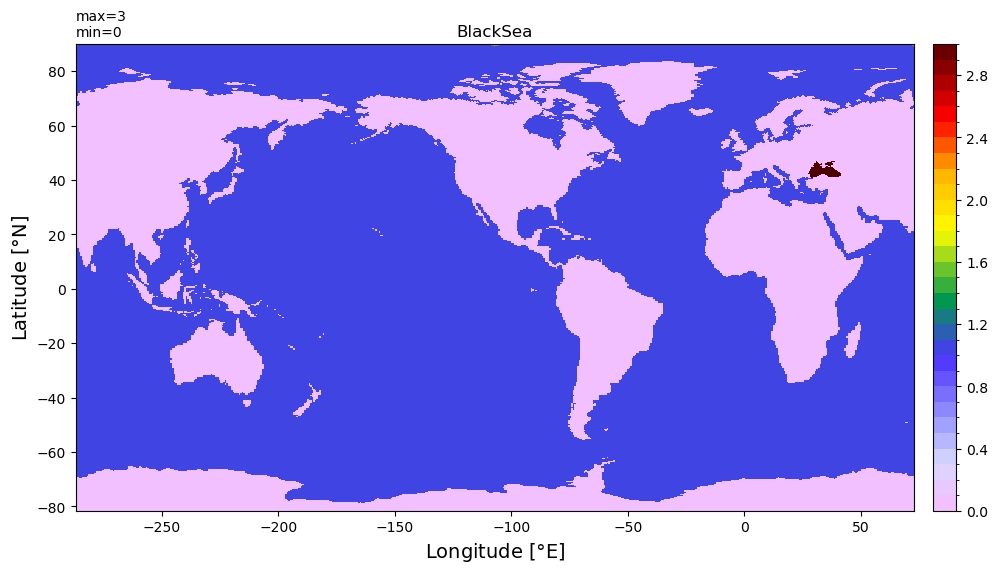

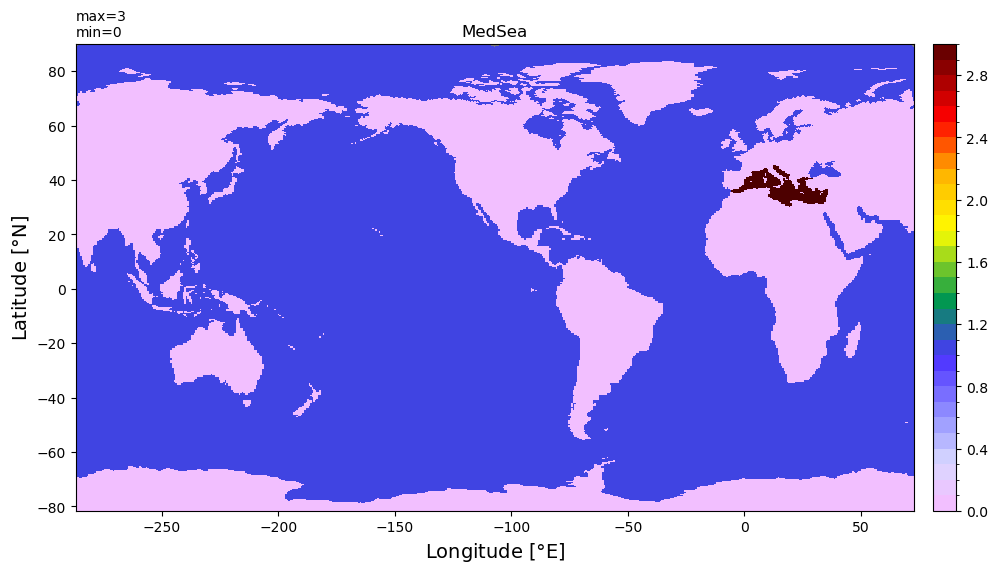

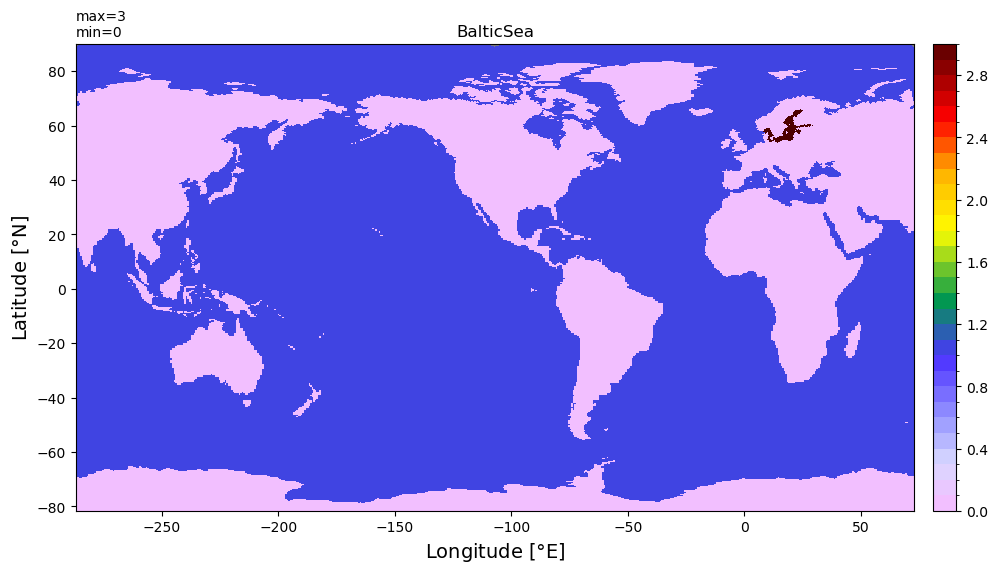

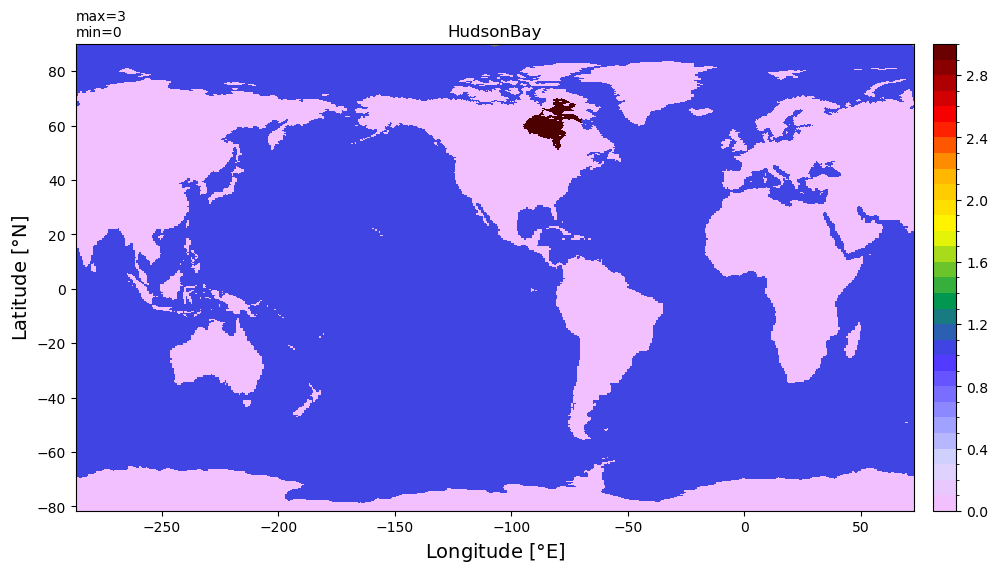

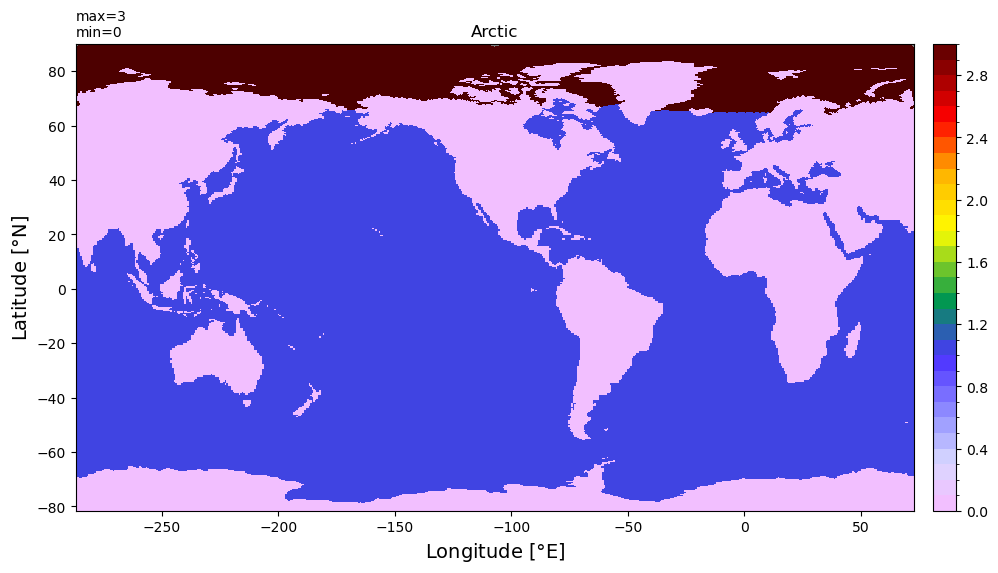

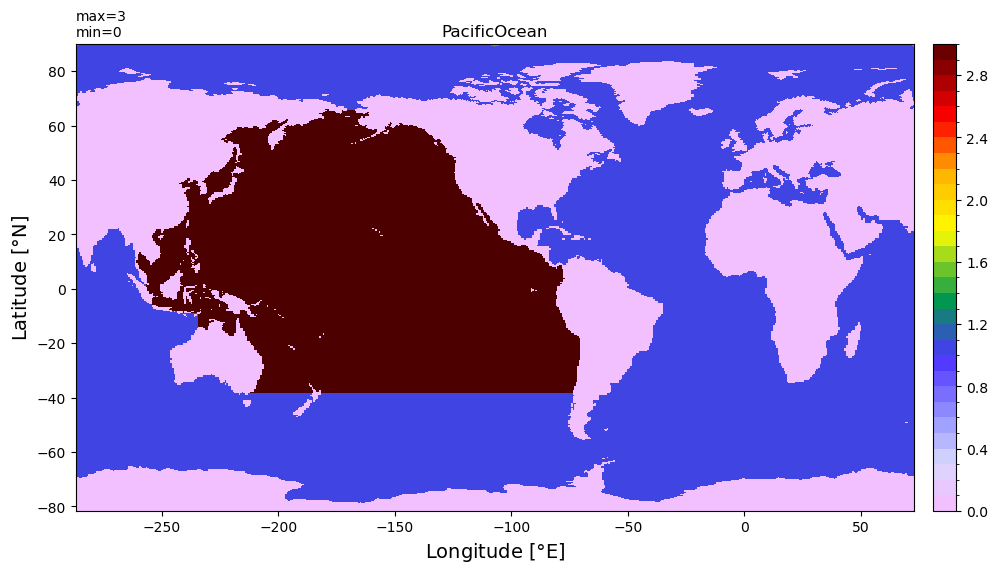

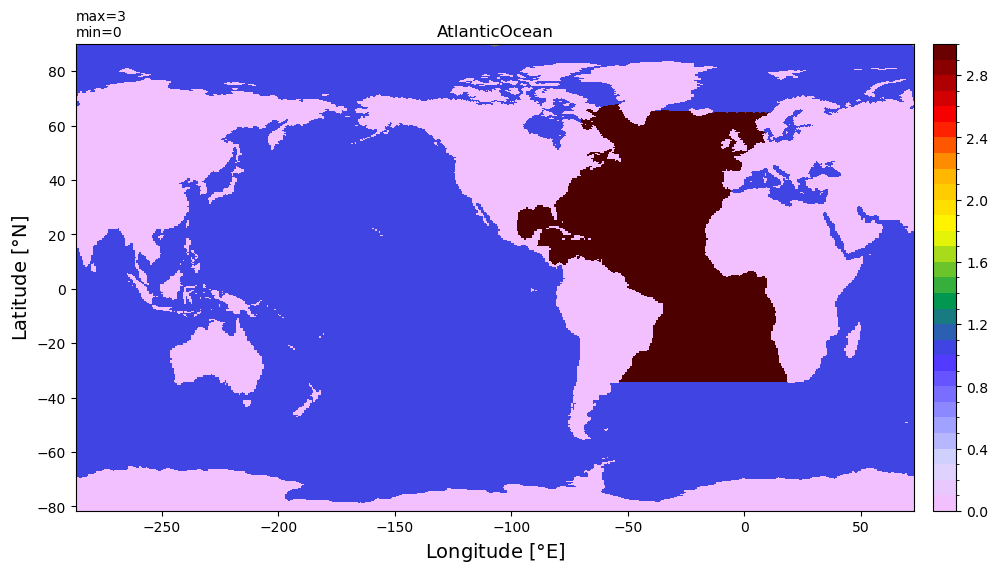

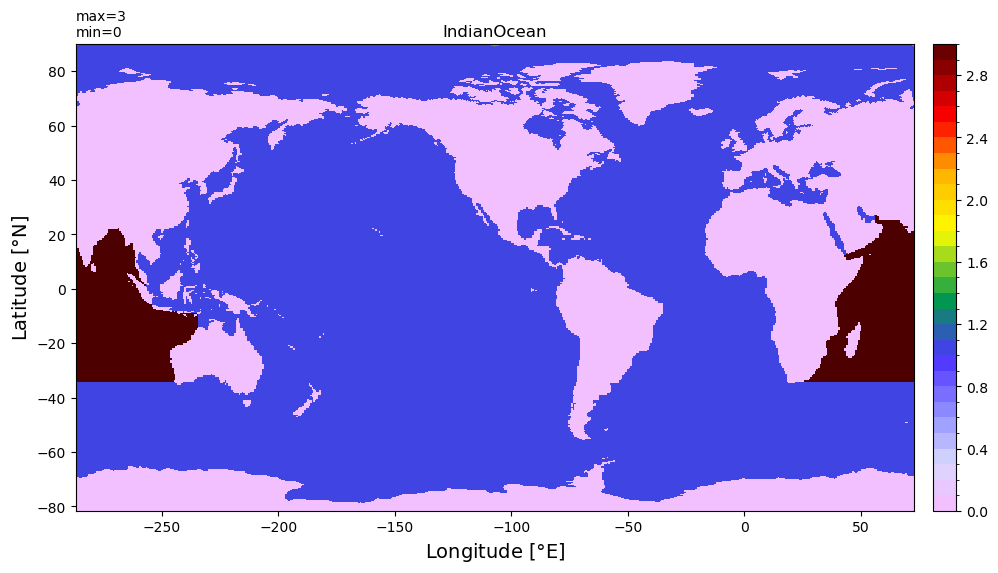

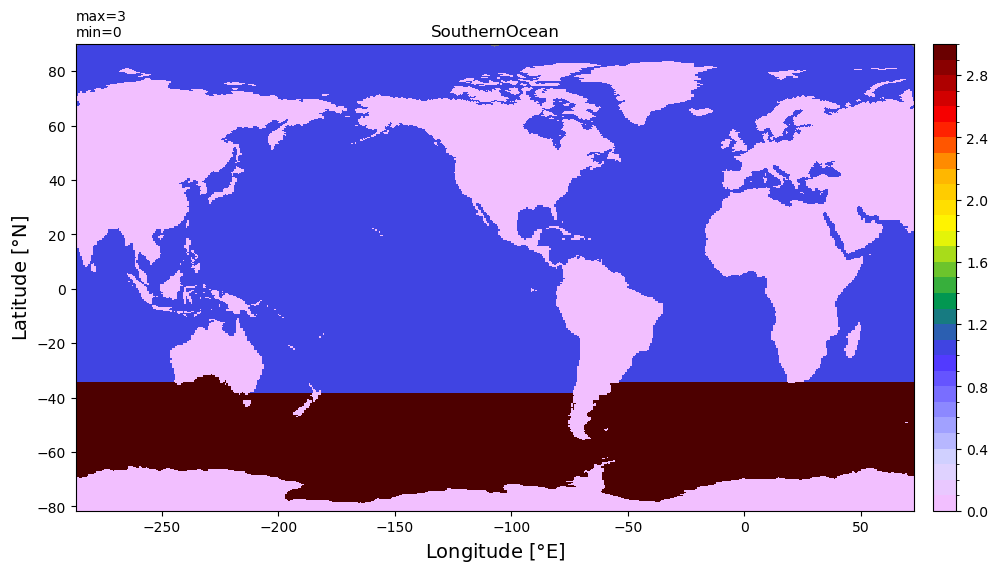

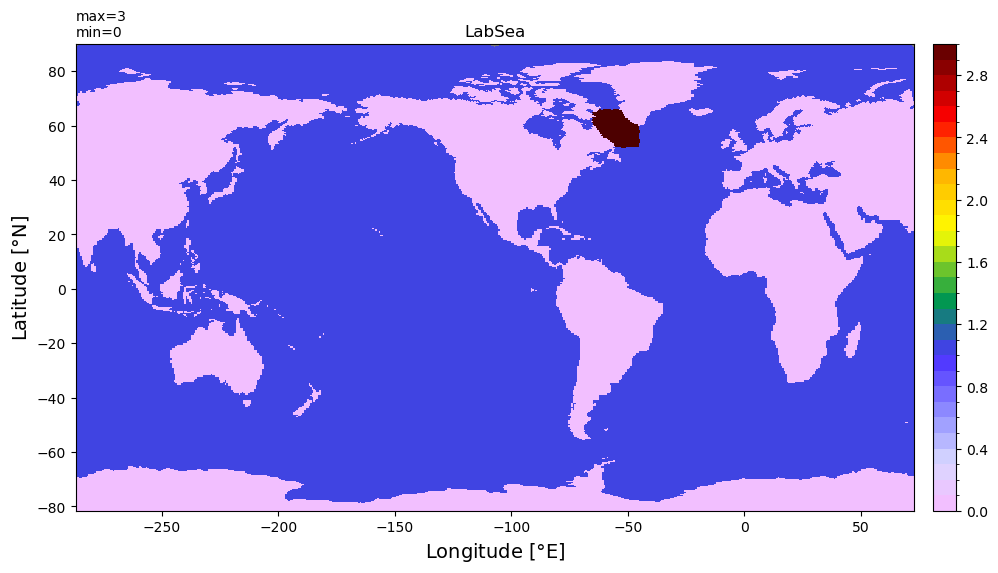

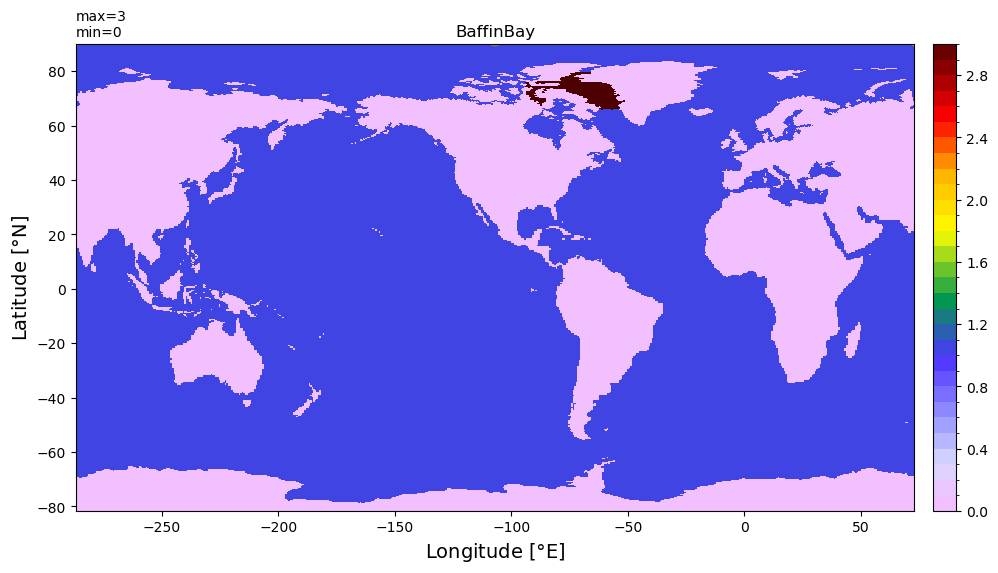

In [11]:
for r in range(len(basin_code.region)):
    #plt.figure(figsize=(12,8))
    xyplot((basin_code[0,:]+basin_code[r,:]*2).values, grd.geolon, grd.geolat,
          title=str(basin_code['region'][r].values))